In [30]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
housing_data = pd.read_csv("FinalHousing.csv")
city_data = pd.read_csv("500_City_cleaned.csv")

In [3]:
housing_data.head()

,tract,HPI
0,1073003200,147.35
1,1073003300,211.99
2,1073010500,167.48
3,1073010701,670.86
4,1073010801,607.68


In [4]:
housing_data.dtypes

tract     int64
HPI      object
dtype: object

In [5]:
#housing_data['HPI'] = housing_data['HPI'].astype(float)  didn't work
housing_data['HPI'] = pd.to_numeric(housing_data['HPI'], errors='coerce')

In [6]:
median_hpi = housing_data['HPI'].median()
print(median_hpi)

389.97


In [7]:
performance = []
for value in housing_data['HPI']:
    if value >= median_hpi:
        performance.append('Overperforming')
    else:
        performance.append('Underperforming')
housing_data['Performance'] = performance
housing_data.head(10)

,tract,HPI,Performance
0,1073003200,147.35,Underperforming
1,1073003300,211.99,Underperforming
2,1073010500,167.48,Underperforming
3,1073010701,670.86,Overperforming
4,1073010801,607.68,Overperforming
5,1073010802,670.86,Overperforming
6,1073010803,607.68,Overperforming
7,1073010805,607.68,Overperforming
8,1073011207,210.11,Underperforming
9,1073011803,210.11,Underperforming


In [8]:
housing_data.head()

,tract,HPI,Performance
0,1073003200,147.35,Underperforming
1,1073003300,211.99,Underperforming
2,1073010500,167.48,Underperforming
3,1073010701,670.86,Overperforming
4,1073010801,607.68,Overperforming


In [9]:
city_data.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,Insurance,HighBloodPressure,Cancer,Asthma,HeartDisease,AnnualCheckUps,Smokes,MentalHealthIssues,Latitude,Longitude,newFIPS,CountyFIPS
0,AL,Birmingham,107000,1073003200,0107000-01073003200,931.0,26.8,57.0,6.0,14.4,11.1,78.2,29.6,22.0,33.509402,-86.885908,1073,1073
1,AL,Birmingham,107000,1073003300,0107000-01073003300,947.0,21.4,55.2,6.8,12.9,9.7,80.1,22.6,16.7,33.517126,-86.891382,1073,1073
2,AL,Birmingham,107000,1073010500,0107000-01073010500,114.0,23.9,60.5,7.1,13.6,11.1,80.7,26.5,18.6,33.436379,-86.912892,1073,1073
3,AL,Birmingham,107000,1073010701,0107000-01073010701,74.0,19.8,24.9,2.7,11.2,2.4,66.2,18.1,16.1,33.473886,-86.814649,1073,1073
4,AL,Birmingham,107000,1073010801,0107000-01073010801,168.0,7.3,33.0,7.4,8.9,4.5,73.7,8.5,8.8,33.514098,-86.746697,1073,1073


In [10]:
city_data.dtypes

StateAbbr              object
PlaceName              object
PlaceFIPS               int64
TractFIPS               int64
Place_TractID          object
Population2010        float64
Insurance             float64
HighBloodPressure     float64
Cancer                float64
Asthma                float64
HeartDisease          float64
AnnualCheckUps        float64
Smokes                float64
MentalHealthIssues    float64
Latitude              float64
Longitude             float64
newFIPS                 int64
CountyFIPS              int64
dtype: object

In [11]:
df = pd.merge(
    city_data,housing_data,left_on='TractFIPS',right_on='tract',how='left')
df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,Insurance,HighBloodPressure,Cancer,Asthma,...,AnnualCheckUps,Smokes,MentalHealthIssues,Latitude,Longitude,newFIPS,CountyFIPS,tract,HPI,Performance
0,AL,Birmingham,107000,1073003200,0107000-01073003200,931.0,26.8,57.0,6.0,14.4,...,78.2,29.6,22.0,33.509402,-86.885908,1073,1073,1.073003e+09,147.35,Underperforming
1,AL,Birmingham,107000,1073003300,0107000-01073003300,947.0,21.4,55.2,6.8,12.9,...,80.1,22.6,16.7,33.517126,-86.891382,1073,1073,1.073003e+09,211.99,Underperforming
2,AL,Birmingham,107000,1073010500,0107000-01073010500,114.0,23.9,60.5,7.1,13.6,...,80.7,26.5,18.6,33.436379,-86.912892,1073,1073,1.073010e+09,167.48,Underperforming
3,AL,Birmingham,107000,1073010701,0107000-01073010701,74.0,19.8,24.9,2.7,11.2,...,66.2,18.1,16.1,33.473886,-86.814649,1073,1073,1.073011e+09,670.86,Overperforming
4,AL,Birmingham,107000,1073010801,0107000-01073010801,168.0,7.3,33.0,7.4,8.9,...,73.7,8.5,8.8,33.514098,-86.746697,1073,1073,1.073011e+09,607.68,Overperforming


In [12]:
df = df.drop('tract',axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1377
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StateAbbr           1378 non-null   object 
 1   PlaceName           1378 non-null   object 
 2   PlaceFIPS           1378 non-null   int64  
 3   TractFIPS           1378 non-null   int64  
 4   Place_TractID       1378 non-null   object 
 5   Population2010      1378 non-null   float64
 6   Insurance           1378 non-null   float64
 7   HighBloodPressure   1378 non-null   float64
 8   Cancer              1378 non-null   float64
 9   Asthma              1378 non-null   float64
 10  HeartDisease        1378 non-null   float64
 11  AnnualCheckUps      1378 non-null   float64
 12  Smokes              1378 non-null   float64
 13  MentalHealthIssues  1378 non-null   float64
 14  Latitude            1378 non-null   float64
 15  Longitude           1378 non-null   float64
 16  newFIP

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,Insurance,HighBloodPressure,Cancer,Asthma,HeartDisease,AnnualCheckUps,Smokes,MentalHealthIssues,Latitude,Longitude,newFIPS,CountyFIPS,HPI,Performance
0,AL,Birmingham,107000,1073003200,0107000-01073003200,931.0,26.8,57.0,6.0,14.4,11.1,78.2,29.6,22.0,33.509402,-86.885908,1073,1073,147.35,Underperforming
1,AL,Birmingham,107000,1073003300,0107000-01073003300,947.0,21.4,55.2,6.8,12.9,9.7,80.1,22.6,16.7,33.517126,-86.891382,1073,1073,211.99,Underperforming
2,AL,Birmingham,107000,1073010500,0107000-01073010500,114.0,23.9,60.5,7.1,13.6,11.1,80.7,26.5,18.6,33.436379,-86.912892,1073,1073,167.48,Underperforming
3,AL,Birmingham,107000,1073010701,0107000-01073010701,74.0,19.8,24.9,2.7,11.2,2.4,66.2,18.1,16.1,33.473886,-86.814649,1073,1073,670.86,Overperforming
4,AL,Birmingham,107000,1073010801,0107000-01073010801,168.0,7.3,33.0,7.4,8.9,4.5,73.7,8.5,8.8,33.514098,-86.746697,1073,1073,607.68,Overperforming


<AxesSubplot:>

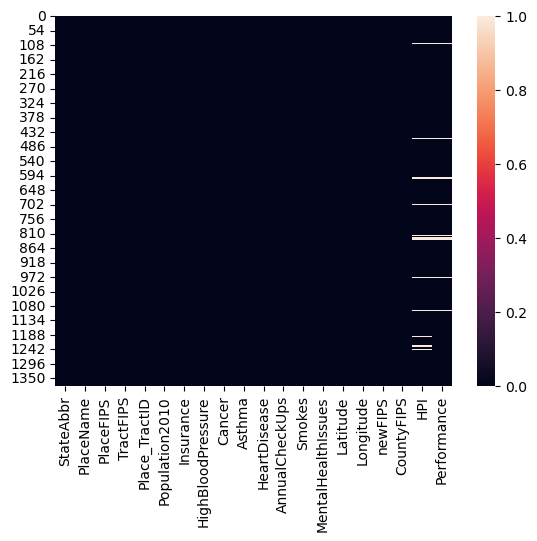

In [13]:
import seaborn as sns
sns.heatmap(df.isnull())

In [14]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1318 entries, 0 to 1377
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StateAbbr           1318 non-null   object 
 1   PlaceName           1318 non-null   object 
 2   PlaceFIPS           1318 non-null   int64  
 3   TractFIPS           1318 non-null   int64  
 4   Place_TractID       1318 non-null   object 
 5   Population2010      1318 non-null   float64
 6   Insurance           1318 non-null   float64
 7   HighBloodPressure   1318 non-null   float64
 8   Cancer              1318 non-null   float64
 9   Asthma              1318 non-null   float64
 10  HeartDisease        1318 non-null   float64
 11  AnnualCheckUps      1318 non-null   float64
 12  Smokes              1318 non-null   float64
 13  MentalHealthIssues  1318 non-null   float64
 14  Latitude            1318 non-null   float64
 15  Longitude           1318 non-null   float64
 16  newFIP

In [23]:
feature_cols = ['HighBloodPressure','Cancer','Asthma','HeartDisease','Smokes']
X = df2[feature_cols]
y = df2.Performance

In [24]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [25]:
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6818181818181818


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[117  49]
 [ 56 108]]


In [28]:
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

 Overperforming       0.68      0.70      0.69       166
Underperforming       0.69      0.66      0.67       164

       accuracy                           0.68       330
      macro avg       0.68      0.68      0.68       330
   weighted avg       0.68      0.68      0.68       330

